# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. I Putu Sri Randha Yoga - 1301213120
2. Annisa Izzatul Latifa - 1301213328
3. Rifqah Amaliyah - 1301213241

#### Latar Belakang
Dalam berbagai disiplin ilmu dan sektor industri, penting untuk memiliki model prediksi yang akurat guna memahami dan memproyeksikan peristiwa berdasarkan data yang kita miliki. Prediksi berdasarkan data numerik seringkali diperlukan, dan salah satu cara umum yang digunakan untuk mencapai tujuan tersebut adalah dengan menggunakan teknik regresi. Regresi adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel independen (input) dan variabel dependen (output) dengan tujuan untuk memprediksi output berdasarkan input yang diberikan.

Dalam upaya meningkatkan akurasi prediksi, Neural Network hadir sebagai sebuah model matematika yang terinspirasi dari struktur jaringan saraf otak manusia. Neural Network terdiri dari artificial neuron yang berkomunikasi satu sama lain dan memiliki kemampuan luar biasa untuk mengenali pola-pola yang rumit dalam data. Ketika diterapkan dalam konteks regresi, Neural Network membantu kita untuk memahami serta menggambarkan hubungan yang rumit antara berbagai variabel input dan output.

Regresi Neural Network, adalah varian khusus dari Neural Network yang dikembangkan secara spesifik untuk menangani permasalahan regresi. Dengan menggunakan Regresi Neural Network, kita dapat membuat model prediksi yang mampu mengestimasi kekuatan tekan beton pada berbagai kombinasi komposisi campuran dan usia beton. Hal ini memungkinkan insinyur sipil, arsitek, dan perancang struktur untuk mengambil keputusan yang lebih baik dalam perancangan struktur beton yang kuat dan tahan lama, berdasarkan pemahaman yang mendalam tentang faktor-faktor yang memengaruhi kekuatan tekan beton.


In [ ]:
# Import library (yang dirasa sangat perlu)
# Library untuk memudahkan analisis data
import pandas as pd
import numpy as np
import math

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from IPython.display import clear_output

# Untuk tidak mencetak warning
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# Data Preprocessing

# Buka dataset
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
# Rename nama kolom
updated_col_names = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
                     'CoarseAggregrate', 'FineAggregate', 'Age', 'CompressiveStrength']

df.columns = updated_col_names
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregrate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Exploration Data Analysis

In [ ]:
# Tampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregrate     1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
# Cek null value pada masing masing atribut

df.isnull().sum(axis = 0)

Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregrate       0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64

In [ ]:
# Memeriksa duplikasi
duplicates = df[df.duplicated()]
total_duplicates = df.duplicated().sum()

# Menampilkan data duplikasi
print("Total Duplikasi:", total_duplicates)
print("Data Duplikasi:")
print(duplicates)

Total Duplikasi: 25
Data Duplikasi:
     Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
77    425.0             106.3     0.0  153.5              16.5   
80    425.0             106.3     0.0  153.5              16.5   
86    362.6             189.0     0.0  164.9              11.6   
88    362.6             189.0     0.0  164.9              11.6   
91    362.6             189.0     0.0  164.9              11.6   
100   425.0             106.3     0.0  153.5              16.5   
103   425.0             106.3     0.0  153.5              16.5   
109   362.6             189.0     0.0  164.9              11.6   
111   362.6             189.0     0.0  164.9              11.6   
123   425.0             106.3     0.0  153.5              16.5   
126   425.0             106.3     0.0  153.5              16.5   
132   362.6             189.0     0.0  164.9              11.6   
134   362.6             189.0     0.0  164.9              11.6   
137   362.6             189.0     0.0  1

In [ ]:
# Menghapus data duplikasi
df_no_duplicates = df.drop_duplicates()
df = df_no_duplicates

# Menampilkan DataFrame tanpa data duplikasi
print("DataFrame Tanpa Data Duplikasi:")
print(df)

DataFrame Tanpa Data Duplikasi:
      Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0      540.0               0.0     0.0  162.0               2.5   
1      540.0               0.0     0.0  162.0               2.5   
2      332.5             142.5     0.0  228.0               0.0   
3      332.5             142.5     0.0  228.0               0.0   
4      198.6             132.4     0.0  192.0               0.0   
...      ...               ...     ...    ...               ...   
1025   276.4             116.0    90.3  179.6               8.9   
1026   322.2               0.0   115.6  196.0              10.4   
1027   148.5             139.4   108.6  192.7               6.1   
1028   159.1             186.7     0.0  175.6              11.3   
1029   260.9             100.5    78.3  200.6               8.6   

      CoarseAggregrate  FineAggregate  Age  CompressiveStrength  
0               1040.0          676.0   28            79.986111  
1               1055.0         

In [ ]:
# Cek Statistik Deskriptif dataset
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregrate,FineAggregate,Age,CompressiveStrength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


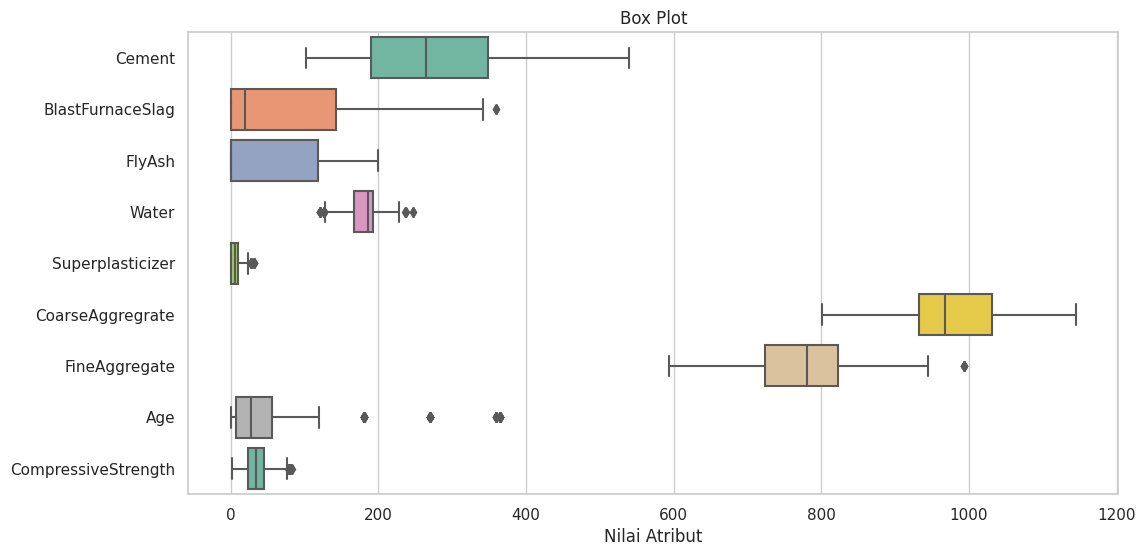

In [ ]:
# Visualisasi seluruh atribut dengan boxplot untuk melihat outlier pada dataset
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Menggambar box plot untuk seluruh atribut
sns.boxplot(data=df, orient="h", palette="Set2")
plt.xlabel('Nilai Atribut')
plt.title('Box Plot')
plt.show()

In [ ]:
# Inisialisasi list untuk menyimpan jumlah outlier tiap atribut
jumlah_outlier_per_atribut = []

# Loop melalui semua atribut
for column in df.columns:
    # Pilih atribut
    attribute_data = df[column]

    # Hitung Q1 dan Q3
    Q1 = attribute_data.quantile(0.25)
    Q3 = attribute_data.quantile(0.75)

    # Hitung IQR
    IQR = Q3 - Q1

    # Tentukan batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = (attribute_data < lower_bound) | (attribute_data > upper_bound)

    # Menghitung jumlah outlier
    jumlah_outlier = outliers.sum()

    # Menambahkan jumlah outlier ke dalam list
    jumlah_outlier_per_atribut.append((column, jumlah_outlier))

# Menampilkan list jumlah outlier per atribut
print("Jumlah Outlier per Atribut:\n")
for atribut, jumlah in jumlah_outlier_per_atribut:
    print(f"{atribut} : {jumlah} data outlier")


Jumlah Outlier per Atribut:

Cement : 0 data outlier
BlastFurnaceSlag : 2 data outlier
FlyAsh : 0 data outlier
Water : 15 data outlier
Superplasticizer : 10 data outlier
CoarseAggregrate : 0 data outlier
FineAggregate : 5 data outlier
Age : 59 data outlier
CompressiveStrength : 8 data outlier


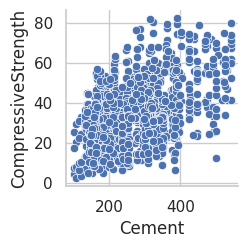

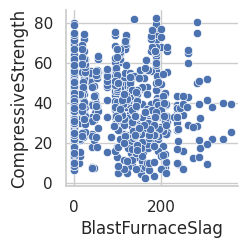

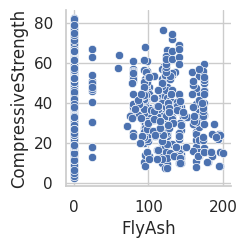

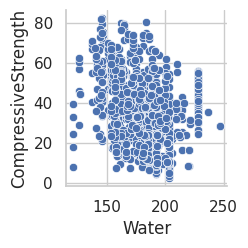

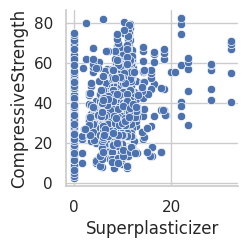

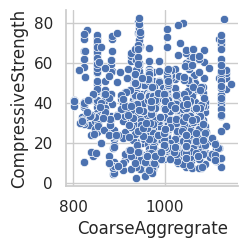

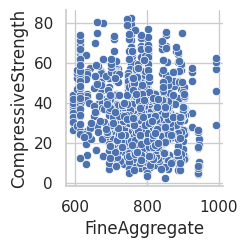

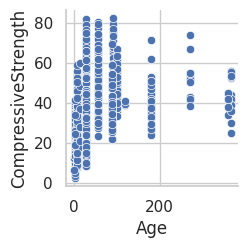

In [ ]:
# Cek korelasi antar atribut

x_arr = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water',
     'Superplasticizer', 'CoarseAggregrate', 'FineAggregate', 'Age']

for x in x_arr:
  sns.pairplot(df,
               x_vars=x,
               y_vars=['CompressiveStrength']
               )
  plt.show()

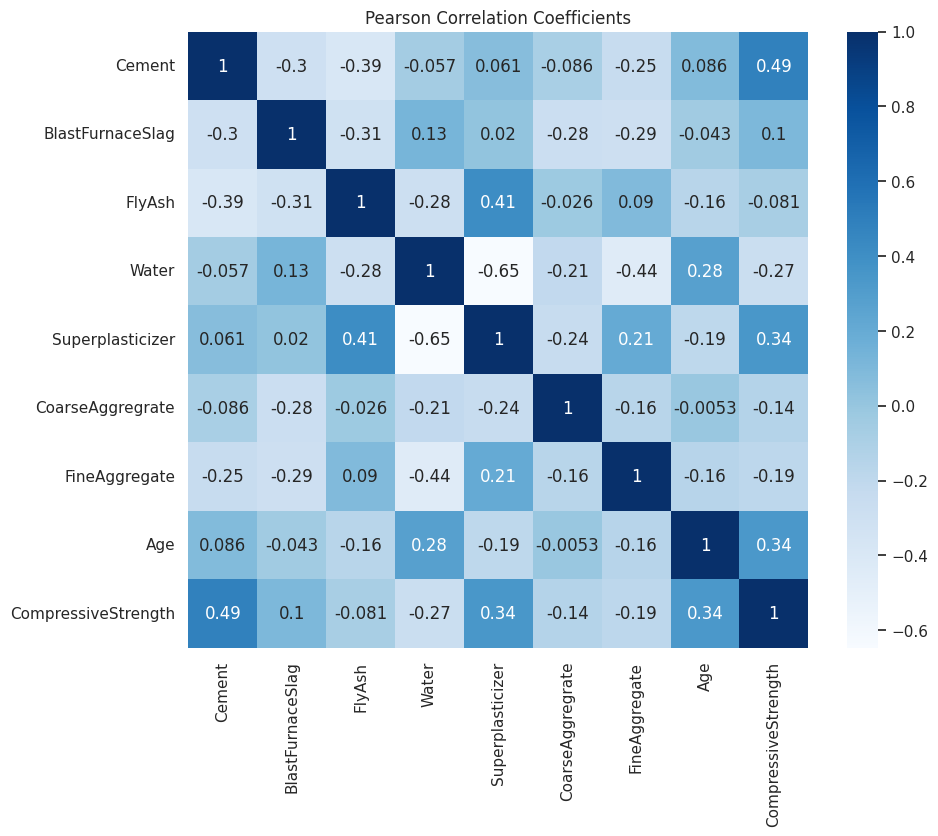

In [ ]:
# Cek Pearson Correlation Coefficient untuk melihat numerical value dari masing masing atribut yang berkorelasi

corr = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Pearson Correlation Coefficients')
plt.show()

In [ ]:
# Tampilkan urutan nilai-nilai korelasi Pearson antar pasangan atribut

corr_sorted = corr.unstack().sort_values(kind='quicksort', ascending = False)

print("Head")
print("--------")
print(corr_sorted[corr_sorted!=1].head(10))
print()
print("Tail")
print("--------")
print(corr_sorted[corr_sorted!=1].tail(10))

Head
--------
CompressiveStrength  Cement                 0.488283
Cement               CompressiveStrength    0.488283
Superplasticizer     FlyAsh                 0.414055
FlyAsh               Superplasticizer       0.414055
CompressiveStrength  Superplasticizer       0.344225
Superplasticizer     CompressiveStrength    0.344225
Age                  CompressiveStrength    0.337371
CompressiveStrength  Age                    0.337371
Water                Age                    0.279269
Age                  Water                  0.279269
dtype: float64

Tail
--------
BlastFurnaceSlag  Cement             -0.303301
Cement            BlastFurnaceSlag   -0.303301
FlyAsh            BlastFurnaceSlag   -0.312342
BlastFurnaceSlag  FlyAsh             -0.312342
Cement            FlyAsh             -0.385618
FlyAsh            Cement             -0.385618
FineAggregate     Water              -0.444888
Water             FineAggregate      -0.444888
Superplasticizer  Water              -0.646875
Wat

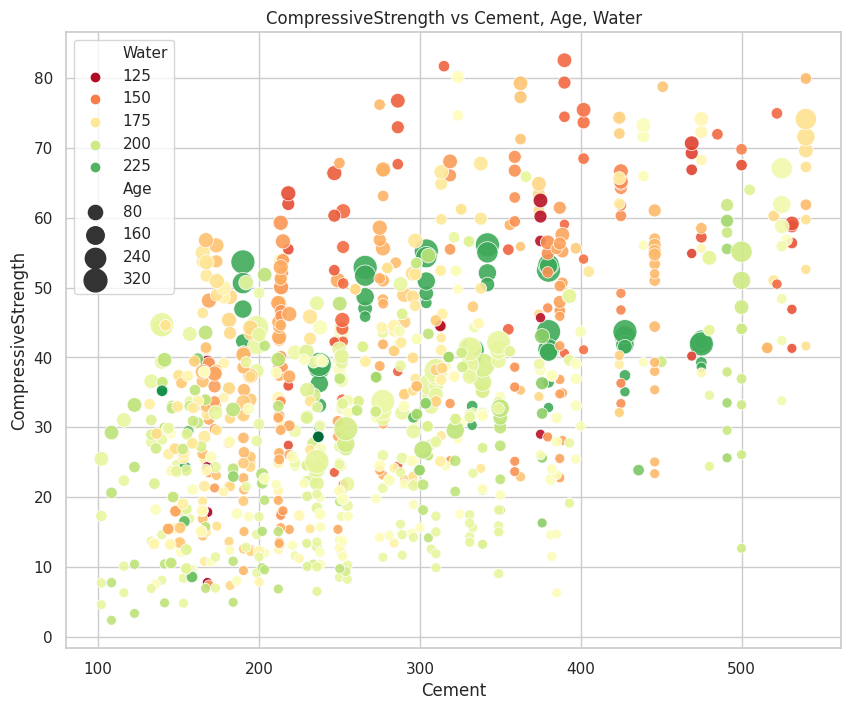

In [ ]:
# Top 3 korelasi positif terhadap atribut "Compressive Strength" --->  "Cement," "Age," dan "Water"

# Membuat scatter plot yang memvisualisasikan hubungan antara atribut "Cement," "Age," dan "Water"
# dengan atribut target "Compressive Strength"

fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="CompressiveStrength", x="Cement", hue="Water", size="Age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("CompressiveStrength vs Cement, Age, Water")
ax.legend()
plt.show()


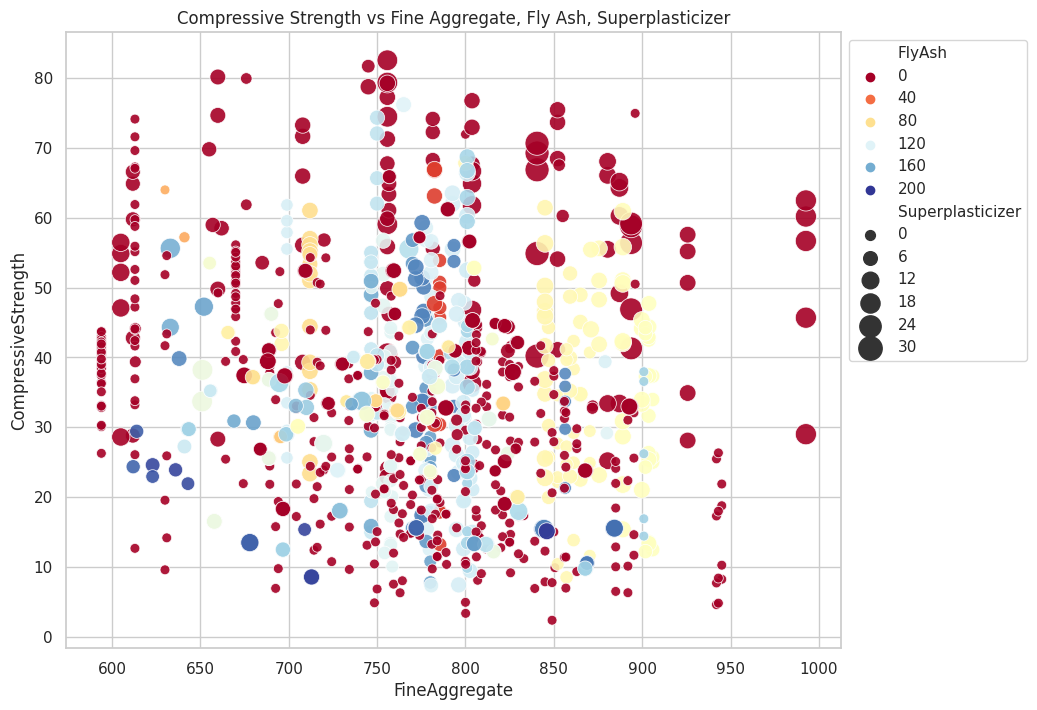

In [ ]:
# Membuat scatter plot yang memvisualisasikan hubungan antara atribut
# "Fine Aggregate," "Fly Ash," dan "Superplasticizer" dengan atribut target "Compressive Strength."


fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="CompressiveStrength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Compressive Strength vs Fine Aggregate, Fly Ash, Superplasticizer")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

In [ ]:
# Shuffling untuk meminimalisir bias
df = df.sample(frac = 1)

In [ ]:
# Pemisahan data target dan data fitur
X = np.array(df.drop(["CompressiveStrength"],1))
y = np.array(df["CompressiveStrength"]).reshape(1005, 1)

In [ ]:
# Pembagian masing-masing data target dan data fitur ke data latih dan data test
splitRatio = 0.8 # di sini digunakan 80% data latih, 20% data test
idxSplit = math.floor(splitRatio * X.shape[0]) # hitung indeks pemisahan data latih dan data test

# Slicing berdasarkan indeks pemisahan yang telah dihitung di atas
X_train = X[:idxSplit]
y_train = y[:idxSplit]
X_test = X[idxSplit:]
y_test = y[idxSplit:]

# Melakukan transpose untuk menyesuaikan bentuk data dengan guide
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

# Mengecek dimensi dari
print("Dimensi data X train:",X_train.shape)
print("Dimensi data X test:",X_test.shape)
print("Dimensi data Y train:",y_train.shape)
print("Dimensi data Y test:",y_test.shape)

Dimensi data X train: (8, 804)
Dimensi data X test: (8, 201)
Dimensi data Y train: (1, 804)
Dimensi data Y test: (1, 201)


#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

In [ ]:
# Fungsi untuk ANN

def initializeParameters(layerDims):
  parameters = {}
  L = len(layerDims) # jumlah layers

  # Inisialisasi parameter (weight dan bias) secara acak untuk L buah layers
  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layerDims[l], layerDims[l-1]) / np.sqrt(layerDims[l-1]) #*0.01
    parameters['b' + str(l)] = np.zeros((layerDims[l], 1))

    assert(parameters['W' + str(l)].shape == (layerDims[l], layerDims[l-1]))
    assert(parameters['b' + str(l)].shape == (layerDims[l], 1))

  return parameters

def relu(Z):
  # Fungsi aktivasi non-linear untuk forward propagation
  A = np.maximum(0,Z)
  cache = Z
  return A, cache

def reluBackward(dA, cache):
  # Fungsi aktivasi backward (turunan dari relu)
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

def linearForward(A, W, b):
  Z = W.dot(A) + b
  cache = (A, W, b)
  return Z, cache

def linearActivationForward(A_prev, W, b, activation):
  if activation == "Output":
    Z, linear_cache = linearForward(A_prev, W, b)
    A, activation_cache = Z,Z
  elif activation == "relu":
    Z, linear_cache = linearForward(A_prev, W, b)
    A, activation_cache = relu(Z)

  cache = (linear_cache, activation_cache)
  return A, cache

def L_modelForward(X, parameters):
  caches = []
  A = X
  L = len(parameters) // 2 # jumlah layer

  # Implement [LINEAR -> RELU]*(L-1).
  for l in range(1, L):
    A_prev = A
    A, cache = linearActivationForward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
    caches.append(cache)

  # Implement LINEAR.
  AL, cache = linearActivationForward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "Output")
  caches.append(cache)

  return AL, caches

def computeCost(AL, Y):
  # Menghitung cost dari yhat=AL and y.
  cost = (1./Y.shape[1]) * (np.sum((np.array(AL)-np.array(Y))**2))
  cost = np.squeeze(cost) # mengganti [[value]] menjadi value).

  return cost

def linearBackward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db


def linearActivationBackward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = reluBackward(dA, activation_cache)
        dA_prev, dW, db = linearBackward(dZ, linear_cache)

    elif activation == "Output":
        dZ = dA
        dA_prev, dW, db = linearBackward(dZ, linear_cache)

    return dA_prev, dW, db


def L_modelBackward(AL, Y, caches):
  grads = {}

  L = len(caches) # jumlah layers
  m = AL.shape[1]
  Y = np.array(Y)
  Y = Y.reshape(AL.shape) #shape Y as AL

  # Inisialisasi backpropagation
  dAL = 2*(np.array(AL)-np.array(Y))
  current_cache = caches[L-1]
  grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linearActivationBackward(dAL, current_cache, activation = "Output")

  for l in reversed(range(L-1)):
    # lth layer: (RELU -> LINEAR) gradien.
    current_cache = caches[l]
    dA_prev_temp, dW_temp, db_temp = linearActivationBackward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
    grads["dA" + str(l + 1)] = dA_prev_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp

  return grads

def updateParameters(parameters, grads, learning_rate):
  L = len(parameters) // 2 # jumlah layer pada neural network

  # Memperbarui parameter
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

  return parameters

def predict(X, y, parameters):
  m = X.shape[1]
  n = len(parameters) // 2 # jumlah layer pada neural network
  p = np.zeros((1,m))

  # Forward propagation terakhir
  hat, caches = L_modelForward(X, parameters)

  #Mean Squared Error
  MSE = 1./m * np.sum((hat - y)**2)

  return hat

# L Layer Neural Net
def L_layerModel(X, Y, layers_dims, learning_rate, iterations, print_cost=False):
  costs = [] # menyimpan urutan costs

  # Inisialisasi parameter
  parameters = initializeParameters(layers_dims)

  # Iterasi forward and backward propagation sebanyak iterations kali
  for i in range(0, iterations):
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> Output(L) (LINEAR)
    AL, caches = L_modelForward(X, parameters)

    # Hitung cost
    cost = computeCost(AL, Y)

    # Backward propagation
    grads = L_modelBackward(AL, Y, caches)

    # Update nilai parameters
    parameters = updateParameters(parameters, grads, learning_rate)

    # Cetak nilai cost-nya setiap 1000 training example
    if print_cost and i % 1000 == 0:
      print ("Cost setelah iterasi %i: %f" %(i, cost))
    if print_cost and i % 1000 == 0:
      costs.append(cost)

  # Plot cost-nya (melihat learning rate)
  print("\n=====================================\n")
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterasi (x 10)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  return parameters

Perubahan nilai cost:
Cost setelah iterasi 0: 1276.883829
Cost setelah iterasi 1000: 104.249003
Cost setelah iterasi 2000: 78.279226
Cost setelah iterasi 3000: 67.778422
Cost setelah iterasi 4000: 62.353685




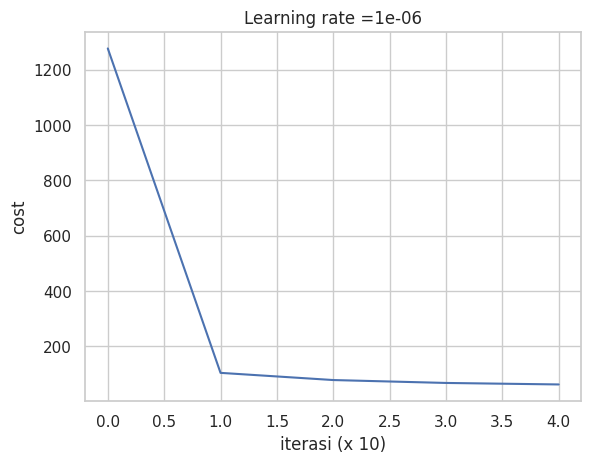



Mean Squared Error Training: 233.84686592046324
Mean Squared Error Test: 59.08636836820096




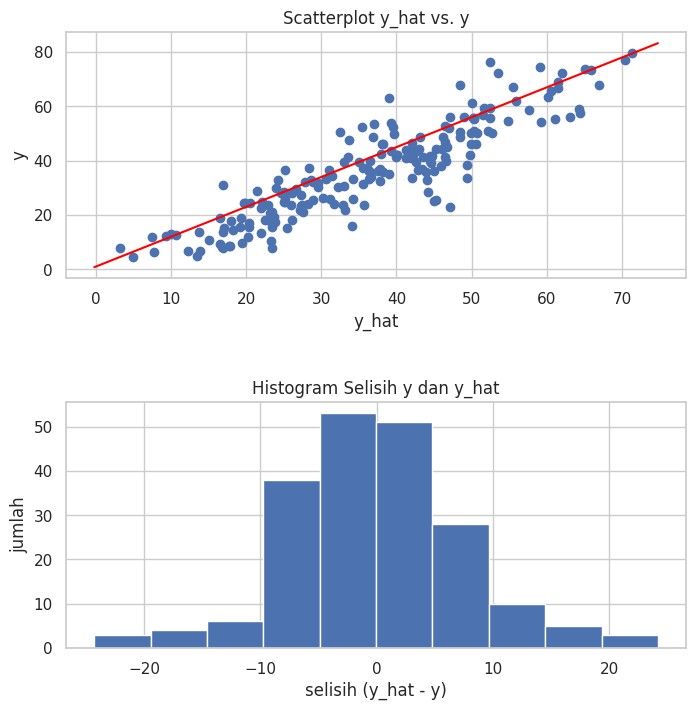

In [ ]:
# Base Model

# Training
n_x = X_train.shape[0]
n_y = y_train.shape[0]
layers_dims = (n_x, 30, 20, 10, n_y) # dimensi layer ANN
print("Perubahan nilai cost:")
parameters = L_layerModel(X_train, y_train, layers_dims = layers_dims, learning_rate=0.000001, iterations = 5000, print_cost = True)
print("\n=====================================\n")

# Prediksi data test
predictions_train = predict(X_train, y_train, parameters)
predictions_test = predict(X_test, y_test, parameters)

# Menghitung perbedaan antara nilai prediksi dan nilai aktual
dif = np.array(y_test)[0,:] - np.array(predictions_test)[0,:]

m = len(np.array(y_test)[0,:])
BM_MSE_train = 1/m*np.sum((np.array(y_train)[0,:] - np.array(predictions_train)[0,:])**2)
BM_MSE_test = 1/m*np.sum((np.array(y_test)[0,:] - np.array(predictions_test)[0,:])**2)

print("Mean Squared Error Training:", BM_MSE_train)
print("Mean Squared Error Test:", BM_MSE_test)
print("\n=====================================\n")

# Membuat actual by predicted plot
t = np.arange(0,y_test.shape[1],1)
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(8, 8))
ax1.scatter(np.array(predictions_test)[0,:],  np.array(y_test)[0,:], label="y")
ax1.set_title('Scatterplot y_hat vs. y')
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="-", color="red")
ax1.set_xlabel('y_hat')
ax1.set_ylabel('y')

ax2.hist(dif)
ax2.set_title('Histogram Selisih y dan y_hat')
ax2.set_xlabel('selisih (y_hat - y)')
ax2.set_ylabel('jumlah')
plt.subplots_adjust(hspace = 0.5)
plt.show(1,1)

Perubahan nilai cost:
Cost setelah iterasi 0: 629.555772
Cost setelah iterasi 1000: 97.315884
Cost setelah iterasi 2000: 89.344726
Cost setelah iterasi 3000: 86.133303
Cost setelah iterasi 4000: 83.915132
Cost setelah iterasi 5000: 79.867024
Cost setelah iterasi 6000: 77.464635
Cost setelah iterasi 7000: 77.805822
Cost setelah iterasi 8000: 72.747194
Cost setelah iterasi 9000: 73.011862




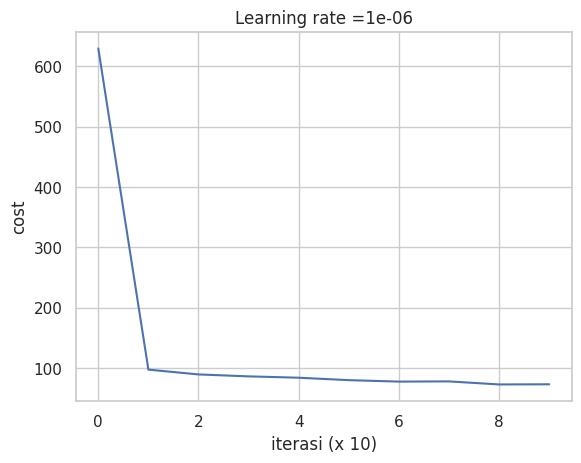



Mean Squared Error Training: 281.31809490038637
Mean Squared Error Test: 71.86349525774575




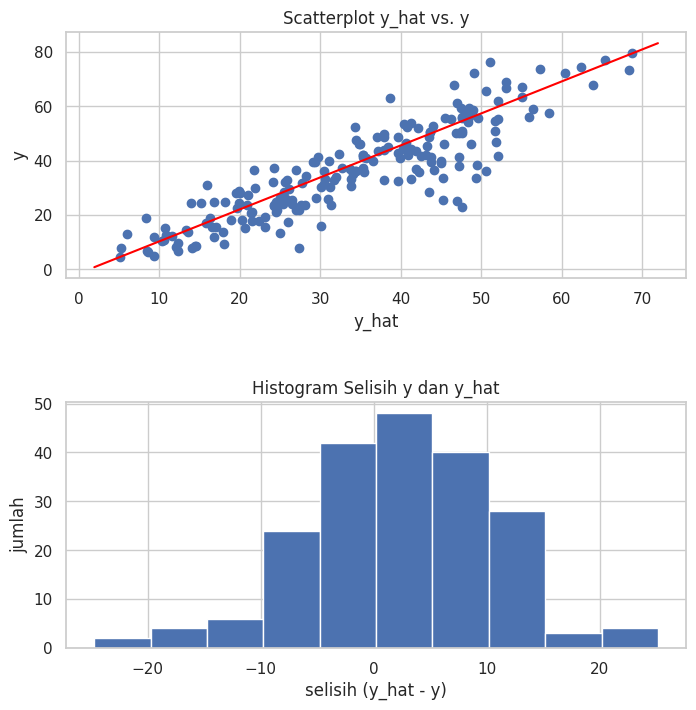

In [ ]:
# Model Exploration (Model 1)
# Pada model ini dilakukan perubahan berupa epoch yang diperbesar 2 kali lipat (dari 5000 ke 10000)

# Training
n_x = X_train.shape[0]
n_y = y_train.shape[0]
layers_dims = (n_x, 30, 20, 10, n_y) # dimensi layer ANN
print("Perubahan nilai cost:")
parameters = L_layerModel(X_train, y_train, layers_dims = layers_dims, learning_rate=0.000001, iterations = 10000, print_cost = True)
print("\n=====================================\n")

# Prediksi data test
predictions_train = predict(X_train, y_train, parameters)
predictions_test = predict(X_test, y_test, parameters)

# Menghitung perbedaan antara nilai prediksi dan nilai aktual
dif = np.array(y_test)[0,:] - np.array(predictions_test)[0,:]

m = len(np.array(y_test)[0,:])
M1_MSE_train = 1/m*np.sum((np.array(y_train)[0,:] - np.array(predictions_train)[0,:])**2)
M1_MSE_test = 1/m*np.sum((np.array(y_test)[0,:] - np.array(predictions_test)[0,:])**2)

print("Mean Squared Error Training:", M1_MSE_train)
print("Mean Squared Error Test:", M1_MSE_test)
print("\n=====================================\n")

# Membuat actual by predicted plot
t = np.arange(0,y_test.shape[1],1)
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(8, 8))
ax1.scatter(np.array(predictions_test)[0,:],  np.array(y_test)[0,:], label="y")
ax1.set_title('Scatterplot y_hat vs. y')
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="-", color="red")
ax1.set_xlabel('y_hat')
ax1.set_ylabel('y')

ax2.hist(dif)
ax2.set_title('Histogram Selisih y dan y_hat')
ax2.set_xlabel('selisih (y_hat - y)')
ax2.set_ylabel('jumlah')
plt.subplots_adjust(hspace = 0.5)
plt.show(1,1)

Perubahan nilai cost:
Cost setelah iterasi 0: 15744.589127
Cost setelah iterasi 1000: 249.264565
Cost setelah iterasi 2000: 212.407506
Cost setelah iterasi 3000: 190.757661
Cost setelah iterasi 4000: 176.289000




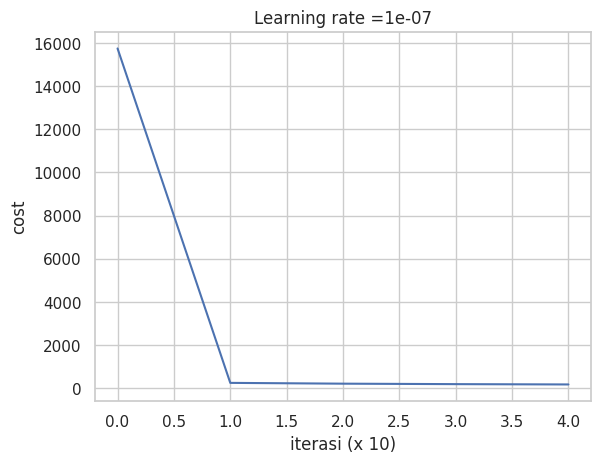



Mean Squared Error Training: 663.1222094483494
Mean Squared Error Test: 192.39342780987064




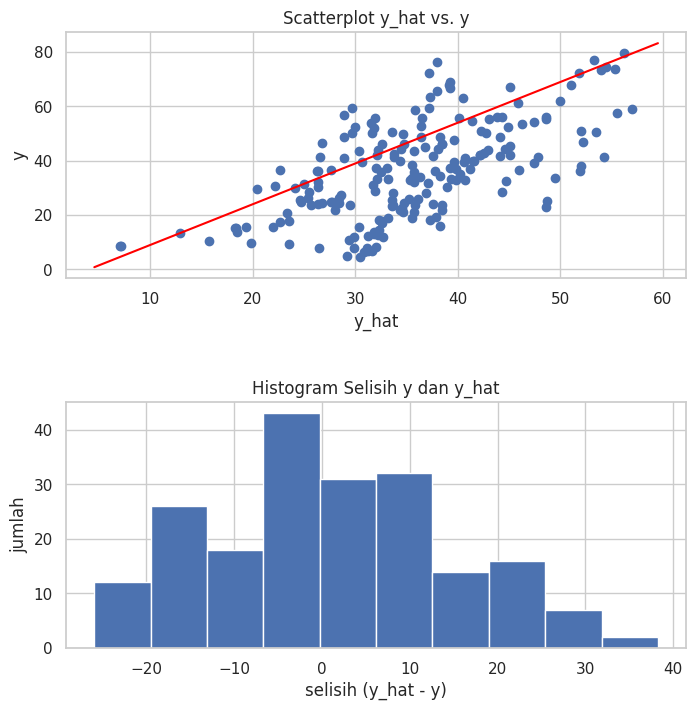

In [ ]:
# Model Exploration (Model 2)
# Pada model ini dilakukan perubahan berupa learning rate yang diperkecil seper-10 menjadi 0.0000001

# Training
n_x = X_train.shape[0]
n_y = y_train.shape[0]
layers_dims = (n_x, 30, 20, 10, n_y) # dimensi layer ANN
print("Perubahan nilai cost:")
parameters = L_layerModel(X_train, y_train, layers_dims = layers_dims, learning_rate=0.0000001, iterations = 5000, print_cost = True)
print("\n=====================================\n")

# Prediksi data test
predictions_train = predict(X_train, y_train, parameters)
predictions_test = predict(X_test, y_test, parameters)

# Menghitung perbedaan antara nilai prediksi dan nilai aktual
dif = np.array(y_test)[0,:] - np.array(predictions_test)[0,:]

m = len(np.array(y_test)[0,:])
M2_MSE_train = 1/m*np.sum((np.array(y_train)[0,:] - np.array(predictions_train)[0,:])**2)
M2_MSE_test = 1/m*np.sum((np.array(y_test)[0,:] - np.array(predictions_test)[0,:])**2)

print("Mean Squared Error Training:", M2_MSE_train)
print("Mean Squared Error Test:", M2_MSE_test)
print("\n=====================================\n")

# Membuat actual by predicted plot
t = np.arange(0,y_test.shape[1],1)
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(8, 8))
ax1.scatter(np.array(predictions_test)[0,:],  np.array(y_test)[0,:], label="y")
ax1.set_title('Scatterplot y_hat vs. y')
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="-", color="red")
ax1.set_xlabel('y_hat')
ax1.set_ylabel('y')

ax2.hist(dif)
ax2.set_title('Histogram Selisih y dan y_hat')
ax2.set_xlabel('selisih (y_hat - y)')
ax2.set_ylabel('jumlah')
plt.subplots_adjust(hspace = 0.5)
plt.show(1,1)

Perubahan nilai cost:
Cost setelah iterasi 0: 505.623483
Cost setelah iterasi 1000: 165.811193
Cost setelah iterasi 2000: 148.938580
Cost setelah iterasi 3000: 136.693986
Cost setelah iterasi 4000: 128.519664




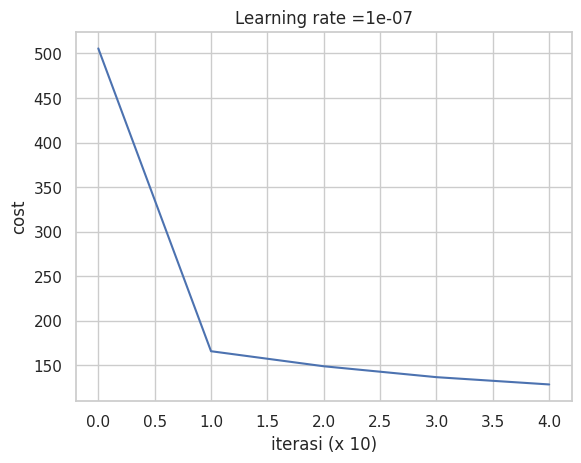



Mean Squared Error Training: 487.3122138425051
Mean Squared Error Test: 134.98638336682373




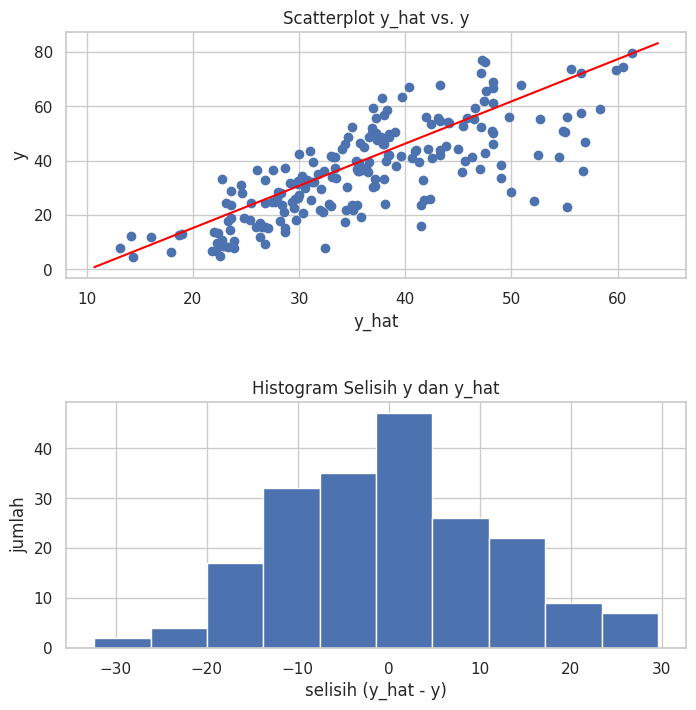

In [ ]:
# Model Exploration (Model 3)
# Pada model ini dilakukan perubahan berupa perubahan dimensi hidden layer dari (n_x, 30, 20, 10, n_y) menjadi (n_x, 60, 50, 40, 30, 20, 10, n_y)

# Training
n_x = X_train.shape[0]
n_y = y_train.shape[0]
layers_dims = (n_x, 60, 50, 40, 30, 20, 10, n_y) # dimensi layer ANN
print("Perubahan nilai cost:")
parameters = L_layerModel(X_train, y_train, layers_dims = layers_dims, learning_rate=0.0000001, iterations = 5000, print_cost = True)
print("\n=====================================\n")

# Prediksi data test
predictions_train = predict(X_train, y_train, parameters)
predictions_test = predict(X_test, y_test, parameters)

# Menghitung perbedaan antara nilai prediksi dan nilai aktual
dif = np.array(y_test)[0,:] - np.array(predictions_test)[0,:]

m = len(np.array(y_test)[0,:])
M3_MSE_train = 1/m*np.sum((np.array(y_train)[0,:] - np.array(predictions_train)[0,:])**2)
M3_MSE_test = 1/m*np.sum((np.array(y_test)[0,:] - np.array(predictions_test)[0,:])**2)

print("Mean Squared Error Training:", M3_MSE_train)
print("Mean Squared Error Test:", M3_MSE_test)
print("\n=====================================\n")

# Membuat actual by predicted plot
t = np.arange(0,y_test.shape[1],1)
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(8, 8))
ax1.scatter(np.array(predictions_test)[0,:],  np.array(y_test)[0,:], label="y")
ax1.set_title('Scatterplot y_hat vs. y')
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="-", color="red")
ax1.set_xlabel('y_hat')
ax1.set_ylabel('y')

ax2.hist(dif)
ax2.set_title('Histogram Selisih y dan y_hat')
ax2.set_xlabel('selisih (y_hat - y)')
ax2.set_ylabel('jumlah')
plt.subplots_adjust(hspace = 0.5)
plt.show(1,1)

MSE Training Model Baseline : 233.84686592046324
MSE Testing Model Baseline  : 59.08636836820096

MSE Training Model 1        : 281.31809490038637
MSE Testing Model 1         : 71.86349525774575

MSE Training Model 2        : 663.1222094483494
MSE Testing Model 2         : 192.39342780987064

MSE Training Model 3        : 487.3122138425051
MSE Testing Model 3         : 134.98638336682373




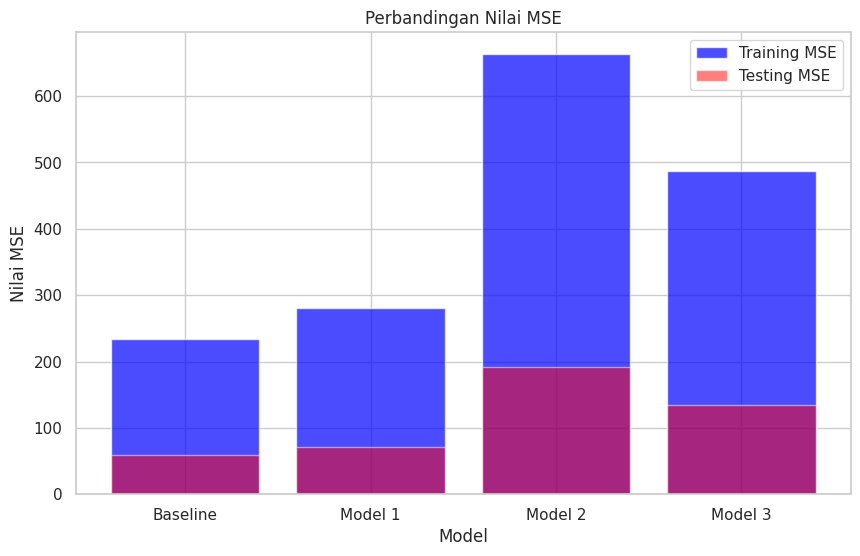

In [ ]:
# Evaluation

# Bandingkan nilai MSE ketiganya
print("MSE Training Model Baseline :", BM_MSE_train)
print("MSE Testing Model Baseline  :", BM_MSE_test)

print("\nMSE Training Model 1        :", M1_MSE_train)
print("MSE Testing Model 1         :", M1_MSE_test)

print("\nMSE Training Model 2        :", M2_MSE_train)
print("MSE Testing Model 2         :", M2_MSE_test)

print("\nMSE Training Model 3        :", M3_MSE_train)
print("MSE Testing Model 3         :", M3_MSE_test)
print("\n")

# Plot perbandingannya
trainingMSE = [BM_MSE_train, M1_MSE_train, M2_MSE_train, M3_MSE_train]
testingMSE = [BM_MSE_test, M1_MSE_test, M2_MSE_test, M3_MSE_test]

namaModel = ['Baseline', 'Model 1', 'Model 2', 'Model 3']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(namaModel, trainingMSE, alpha=0.7, color='blue', label='Training MSE')
plt.bar(namaModel, testingMSE, alpha=0.5, color='red', label='Testing MSE')
plt.xlabel('Model')
plt.ylabel('Nilai MSE')
plt.title('Perbandingan Nilai MSE')
plt.legend()
plt.show()

#### Hasil dan Analisis
Dari hasil evalusi keempat model di atas, diperoleh perbandingan Mean Squared Error (MSE) dari empat model berbeda, yaitu model baseline, Model 1, Model 2, dan Model 3. Untuk setiap model tersebut, terdapat MSE untuk kedua fase, yaitu fase pelatihan (training) dan fase pengujian (testing). MSE adalah metrik yang digunakan untuk mengukur seberapa baik model regresi dalam menyesuaikan data. Semakin rendah MSE, semakin baik kinerja model. Berikut adalah analisis dari masing-masing model:
##### 1. Model Baseline:
Model baseline adalah model referensi yang digunakan untuk membandingkan kinerja model lain. Pada model baseline, MSE pengujian memiliki nilai yang jauh lebih rendah dibandingkan MSE pelatihan.
##### 2. Model 1:
Model 1 memiliki MSE yang lebih tinggi (lebih buruk) baik dalam fase pelatihan maupun pengujian dibandingkan dengan model baseline. Jumlah epoch yang lebih banyak dan nilai MSE yang lebih tinggi mungkin mengindikasikan bahwa terjadi overfitting.
##### 3. Model 2:
Model 2 memiliki MSE yang lebih tinggi (lebih buruk) baik dalam fase pelatihan maupun pengujian dibandingkan dengan model baseline. Nilai learning-rate yang lebih rendah tanpa perubahan nilai epoch menyebabkan model ini belum memiliki waktu yang cukup untuk melakukan learning dengan maksimal.
##### 4. Model 3:
Model 2 memiliki MSE yang lebih tinggi (lebih buruk) baik dalam fase pelatihan maupun pengujian dibandingkan dengan model baseline. Penambahan hidden layer secara secara sewenang-wenang tanpa dikelola dengan baik mungkin hanya menambahkan kompleksitas tambahan dalam model sehingga menghasilkan nilai MSE yang lebih tinggi.

#### Kesimpulan
Berdasarkan evaluasi serta analisis hasil konfigurasi model, kita dapat lebih memahami mengapa model dengan konfigurasi yang berbeda memiliki performa yang berbeda juga. Model baseline adalah model dengan kinerja yang terbaik, ini dikarenakan model baseline memiliki kesimbangan antara nilai-nilai hyperparameter-nya. Sementara itu, model 1 yang memiliki epoch lebih besar, mungkin mengalami overfitting. Selanjutnya, model 2 yang memiliki nilai learning rate yang lebih kecil mungkin mengindikasikan bahwa epoch-nya tidak seimbang. Terakhir, model 3 yang memiliki jumlah hidden layer dan jumlah neuron yang lebih banyak memerlukan pengelolaan yang lebih baik untuk menghindari overfitting. Pada keempat model tersebut terdapat persamaan berupa tidak seimbangnya nilai MSE pengujian dan nilai MSE pelatihan. Hal tersebut mungkin disebabkan oleh pembagian data yang kurang tepat antara data pengujian dan pelatihan. Dengan demikian, pembagian data yang tepat dan penyesuaian konfigurasi model untuk mendapatkan nilai hyperparameter yang seimbang adalah cara yang penting dilakukan untuk meningkatkan kinerja model regresi, baik dalam kasus ini maupun kasus-kasus lainnya.